<a href="https://colab.research.google.com/github/ArtemMaximov77/Analysis_of_traders_positions/blob/main/oil_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Oil Data Mining](#scrollTo=8pa13kemcGSb)

>>[Загрузка данных с CFTC, позиции по WTI](#scrollTo=aovEb7xkUgcZ)

>>>[Этот блок ячеек можно не выполнять, а перейти сразу к следующему](#scrollTo=dFFS7KUSyZ2Q)

>>>[Загрузка готового фрейма данных](#scrollTo=1PXVVYyoyrCq)

>>[Загрузка котировок нефти WTI](#scrollTo=rxM5c2wIp09K)

>>[Загрузка данных с ICE, позиции по Brent](#scrollTo=ogb1ZHs6GkeO)

>>[Загрузка котировок нефти Brent](#scrollTo=YPm4UO199hRG)

>>[Загрузка данных с MOEX](#scrollTo=Sbj8gdD0MdE8)

>>[Скачать готовые данные](#scrollTo=7QXjdPwurOI6)



# Oil Data Mining

In [35]:
import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import tqdm

## Загрузка данных с CFTC, позиции по WTI

Для получения данных по WTI будем использовать сайт [Commitments of Traders](https://www.cftc.gov/)

### Этот блок ячеек можно не выполнять, а перейти сразу к следующему

In [ ]:
url = 'https://www.cftc.gov/files/dea/history/fut_disagg_xls_hist_2006_2016.zip'
! wget $url
! unzip /content/fut_disagg_xls_hist_2006_2016.zip
df = pd.read_excel('/content/F_DisAgg06_15.xls')
! rm *zip, *xls

In [ ]:
# Для нефти WTI код 067651
df_wti = df[df['CFTC_Contract_Market_Code'] == '067651']
# Удалим ненужные столбцы, начиная с 23
df_wti = df_wti.drop(df.iloc[:, 23:], axis=1)
# Удалим ненужные колонки
df_wti = df_wti.drop(['Market_and_Exchange_Names', 'As_of_Date_In_Form_YYMMDD',
                      'CFTC_Contract_Market_Code', 'CFTC_Market_Code', 'CFTC_Region_Code',
                      'CFTC_Commodity_Code', 'Tot_Rept_Positions_Long_All',
                      'Tot_Rept_Positions_Short_All'], axis=1)
# Отредактируем названия колонок
df_wti.rename(columns={'Report_Date_as_MM_DD_YYYY': 'date',
                       'Open_Interest_All': 'oi',
                       'Prod_Merc_Positions_Long_ALL': 'Prod_Merc_Long',
                       'Prod_Merc_Positions_Short_ALL': 'Prod_Merc_Short',
                       'Swap_Positions_Long_All': 'Swap_Long',
                       'Swap__Positions_Short_All': 'Swap_Short',
                       'Swap__Positions_Spread_All': 'Swap_Spread',
                       'M_Money_Positions_Long_ALL': 'M_Money_Long',
                       'M_Money_Positions_Short_ALL': 'M_Money_Short',
                       'M_Money_Positions_Spread_ALL': 'M_Money_Spread',
                       'Other_Rept_Positions_Long_ALL': 'Other_Rept_Long',
                       'Other_Rept_Positions_Short_ALL': 'Other_Rept_Short',
                       'Other_Rept_Positions_Spread_ALL': 'Other_Rept_Spread',
                       'NonRept_Positions_Long_All': 'NonRept_Long',
                       'NonRept_Positions_Short_All': 'NonRept_Short'}, inplace=True)
df_wti.columns = df_wti.columns.str.lower()

In [ ]:
df_wti = df_wti.sort_values('date')

In [ ]:
df_wti.head()

In [ ]:
!mkdir COT_WTI

In [ ]:
df_wti.to_csv('COT_WTI/COT_WTI.csv', index=False)

In [ ]:
# Делаем тоже самое с остальными файлами
years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
for year in years:
    url_zip = 'https://www.cftc.gov/files/dea/history/fut_disagg_xls_' + year + '.zip'
    !wget $url_zip # получаем zip-файл
    url_unzip = '/content/fut_disagg_xls_' + year + '.zip'
    !unzip $url_unzip # распаковка в корень коллаба
    df = pd.read_excel('f_year.xls')
    ! rm *
    df_wti = df[df['CFTC_Contract_Market_Code'] == '067651']
    df_wti = df_wti.drop(df.iloc[:, 23:], axis=1)
    df_wti = df_wti.drop(['Market_and_Exchange_Names', 'As_of_Date_In_Form_YYMMDD',
                      'CFTC_Contract_Market_Code', 'CFTC_Market_Code', 'CFTC_Region_Code',
                      'CFTC_Commodity_Code', 'Tot_Rept_Positions_Long_All',
                      'Tot_Rept_Positions_Short_All'], axis=1)
    df_wti = df_wti.sort_values('Report_Date_as_MM_DD_YYYY')
    df_wti.to_csv('COT_WTI/COT_WTI.csv', mode='a', header=False, index = False)
    

### Загрузка готового фрейма данных

In [36]:
url = '''https://raw.githubusercontent.com/ArtemMaximov77/Analysis_of_traders_positions/\
main/Disaggregated%20Futures%20Only%20Reports/COT_WTI.csv'''
df_wti = pd.read_csv(url)

In [37]:
df_wti['date'] = pd.to_datetime(df_wti['date'], format='%Y-%m-%d')

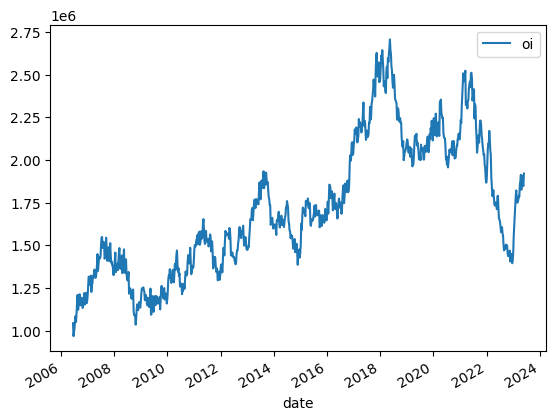

In [ ]:
df_wti.plot(x='date', y='oi');

## Загрузка котировок нефти WTI

Для получения котировок по нефти использован сайт [EIA](https://www.eia.gov/)

In [38]:
# Архив котировок получен в ручную и помещен в github
url = '''https://raw.githubusercontent.com/ArtemMaximov77/Analysis_of_traders_positions/\
main/Disaggregated%20Futures%20Only%20Reports/WTI_Spot_Price.csv'''
df_wti_price = pd.read_csv(url, skiprows=[0, 1, 2, 3, 4], names=['date', 'price_wti'])

In [39]:
df_wti_price['date'] = pd.to_datetime(df_wti_price['date'], format='%m/%d/%Y')
df_wti_price['date'] = df_wti_price['date'].dt.strftime('%Y-%m-%d')
df_wti_price['date'] = pd.to_datetime(df_wti_price['date'], format='%Y-%m-%d')

In [40]:
data_wti = df_wti.merge(df_wti_price, on='date')
# Потеряли 4 строки!

In [41]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=data_wti['date'], y=data_wti['oi'], name="OI"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data_wti['date'], y=data_wti['price_wti'], name="price_WTI"),
    secondary_y=True,
)
fig.update_layout(
    title_text="Изменение открытых позиций и цены WTI"
)
fig.add_vrect(x0="2008-07-01", x1="2008-12-22", 
              annotation_text="-78%", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)
fig.add_vrect(x0="2014-06-17", x1="2016-02-09", 
              annotation_text="-73%", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)
fig.add_vrect(x0="2020-01-07", x1="2020-04-21", 
              annotation_text="-86%", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-06-07", x1="2023-05-30", 
              annotation_text="-42%", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)

fig.update_xaxes(title_text="Дата")
fig.update_yaxes(title_text="<b>OI</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>price_WTI</b>", secondary_y=True)

fig.show()

In [42]:
# data_wti.to_csv('data_wti.csv')

## Загрузка данных с ICE, позиции по Brent

In [ ]:
# Ячейку можно не выполнять, а перейти к следующей и загрузить
columns = ['date', 'oi', 'prod_merc_long', 'prod_merc_short', 'swap_long',
           'swap_short', 'swap_spread', 'm_money_long', 'm_money_short',
           'm_money_spread', 'other_rept_long', 'other_rept_short',
           'other_rept_spread', 'nonrept_long', 'nonrept_short']
! mkdir COT_Brent
years = [str(x) for x in range(2011, 2024)]

for year in years:
    url = f'https://www.theice.com/publicdocs/futures/COTHist{year}.csv'
    ! wget $url
    path = f'COTHist{year}.csv'
    df = pd.read_csv(path)
    df_brent = df[(df['CFTC_Commodity_Code'] == 'B') & (df['FutOnly_or_Combined'] == 'FutOnly')]
    df_brent = df_brent.drop(df.iloc[:, 23:], axis=1)
    df_brent = df_brent.drop(['Market_and_Exchange_Names', 'As_of_Date_Form_MM/DD/YYYY',
                          'CFTC_Contract_Market_Code', 'CFTC_Market_Code', 'CFTC_Region_Code',
                          'CFTC_Commodity_Code', 'Tot_Rept_Positions_Long_All',
                          'Tot_Rept_Positions_Short_All'], axis=1)
    if year == '2011':
        df_brent.columns = columns
        df_brent.to_csv('COT_Brent/COT_Brent.csv', mode='a', header=True, index = False)
    else:
        df_brent.to_csv('COT_Brent/COT_Brent.csv', mode='a', header=False, index = False)

! rm *

In [43]:
url = '''https://raw.githubusercontent.com/ArtemMaximov77/Analysis_of_traders_positions/\
main/Disaggregated%20Futures%20Only%20Reports/COT_Brent.csv'''
df_brent = pd.read_csv(url)

In [44]:
df_brent['date'] = pd.to_datetime(df_brent['date'], format='%y%m%d')

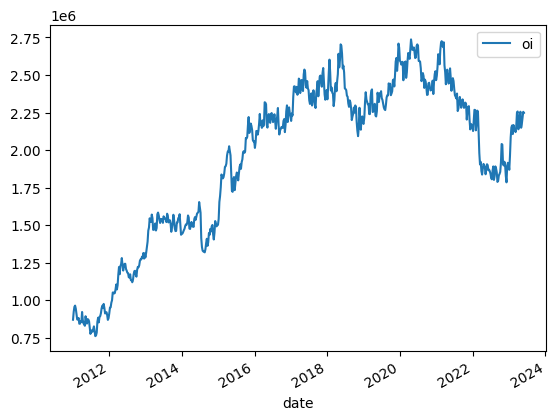

In [71]:
df_brent.plot(x='date', y='oi');

## Загрузка котировок нефти Brent

In [45]:
url = '''https://raw.githubusercontent.com/ArtemMaximov77/Analysis_of_traders_positions/\
main/Disaggregated%20Futures%20Only%20Reports/Europe_Brent_Spot_Price.csv'''
df_brent_price = pd.read_csv(url, skiprows=[0, 1, 2, 3, 4], names=['date', 'price_brent'])

In [46]:
df_brent_price['date'] = pd.to_datetime(df_brent_price['date'], format='%m/%d/%Y')
df_brent_price['date'] = df_brent_price['date'].dt.strftime('%Y-%m-%d')
df_brent_price['date'] = pd.to_datetime(df_brent_price['date'], format='%Y-%m-%d')

In [47]:
data_brent = df_brent.merge(df_brent_price, on='date')
# 8 строк потеряно!

In [ ]:
data_brent.head()

In [48]:
# data_brent.to_csv('data_brent.csv')

## Загрузка данных с MOEX

Фьючерс на нефть марки Brent на ММВБ имеет архив с 01-10-2012  
Надо отметить, что здесь доступны ежедневные данные, в отличии от зарубежных еженедельных данных.  
Поэтому будем брать данные по календарю биржи ICE.  
Также здесь идет разбивка на физических и юридических лиц.

In [178]:
calendar = data_brent[data_brent['date'] >= '2012-10-01']['date']

In [179]:
calendar = calendar.astype('str').str.replace('-', '').to_list()

In [ ]:
# Этот цикл будет выполняться около 25 минут...
# Поэтому лучше эту ячейку не выполнять, а скачать готовый файл, см. след. ячейку
for day in tqdm.trange(calendar):
    url = f'https://www.moex.com/ru/derivatives/open-positions-csv.aspx?d={day}&t=1'
    ! wget $url
    path = f'open-positions-csv.aspx?d={day}'
    df = pd.read_csv(path)
    df = df[(df['contract_type'] == 'F') & (df['isin'] == 'BR')]
    if day == '20121002':
        df.to_csv('COT_Brent/COT_Brent_Moex.csv', mode='a', header=True, index = False)
    else:
        df.to_csv('COT_Brent/COT_Brent_Moex.csv', mode='a', header=False, index = False)
    ! rm *

In [2]:
path = 'https://raw.githubusercontent.com/ArtemMaximov77/Analysis_of_traders_positions/\
main/Disaggregated%20Futures%20Only%20Reports/COT_Brent_Moex.csv'
df_temp = pd.read_csv(path)

In [ ]:
df_temp.info()

In [32]:
df_brent_moex = pd.DataFrame()
df_brent_moex['date'] = df_temp['moment'].drop_duplicates().reset_index(drop=True)
df_brent_moex['fiz_long'] = df_temp[df_temp['iz_fiz'] == 1]['long_position']\
                          .reset_index(drop=True).astype(int)
df_brent_moex['fiz_short'] = df_temp[df_temp['iz_fiz'] == 1]['short_position']\
                          .reset_index(drop=True).astype(int)
df_brent_moex['yur_long'] = df_temp[df_temp['iz_fiz'] != 1]['long_position']\
                          .reset_index(drop=True).astype(int)
df_brent_moex['yur_short'] = df_temp[df_temp['iz_fiz'] != 1]['short_position']\
                          .reset_index(drop=True).astype(int)
df_brent_moex['oi'] = df_brent_moex['fiz_long'] + df_brent_moex['fiz_short']\
                    + df_brent_moex['yur_long'] + df_brent_moex['yur_short']
df_brent_moex['date'] = pd.to_datetime(df_brent_moex['date'], format='%Y-%m-%d')

In [33]:
df_brent_moex.head()

,date,fiz_long,fiz_short,yur_long,yur_short,oi
0,2012-10-02,4980,16082,14641,3539,39242
1,2012-10-09,5844,18430,15581,2995,42850
2,2012-10-16,26021,22998,13045,16068,78132
3,2012-10-23,10301,5098,10987,16190,42576
4,2012-10-30,8301,6239,4336,6398,25274


In [49]:
df_brent_moex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       533 non-null    datetime64[ns]
 1   fiz_long   533 non-null    int64         
 2   fiz_short  533 non-null    int64         
 3   yur_long   533 non-null    int64         
 4   yur_short  533 non-null    int64         
 5   oi         533 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 25.1 KB


In [50]:
# df_brent_moex.to_csv('data_brent_moex.csv')

## Скачать готовые данные

In [ ]:
# data_wti = pd.read_csv('https://raw.githubusercontent.com/ArtemMaximov77/Analysis_of_traders_positions/main/Disaggregated%20Futures%20Only%20Reports/data_wti.csv')

# data_brent = pd.read_csv('https://raw.githubusercontent.com/ArtemMaximov77/Analysis_of_traders_positions/main/Disaggregated%20Futures%20Only%20Reports/data_brent.csv')

# data_brent_moex = pd.read_csv('https://raw.githubusercontent.com/ArtemMaximov77/Analysis_of_traders_positions/main/Disaggregated%20Futures%20Only%20Reports/data_brent_moex.csv')
